# Regularization in Deep Learning

Regularization is a technique used in deep learning to prevent overfitting by adding a penalty to the loss function. It helps improve the generalization of the model on unseen data. Below are some common regularization techniques:

## 1. L1 and L2 Regularization
- **L1 Regularization (Lasso)**: Adds the absolute value of weights to the loss function. It encourages sparsity in the model by driving some weights to zero.
- **L2 Regularization (Ridge)**: Adds the squared value of weights to the loss function. It discourages large weights and helps in weight decay.

### Loss Function with Regularization:
$\text{Loss} = \text{Original Loss} + \lambda \sum_{i} |w_i| \quad (\text{L1})$

$\text{Loss} = \text{Original Loss} + \lambda \sum_{i} w_i^2 \quad (\text{L2})$

## 2. Dropout
- Randomly drops a fraction of neurons during training to prevent co-adaptation of neurons.
- Helps in reducing overfitting and improves generalization.

### Dropout Example:
If the dropout rate is 0.5, half of the neurons are randomly set to zero during each training iteration.

## 3. Early Stopping
- Stops training when the validation loss stops improving.
- Prevents the model from overfitting to the training data.

## 4. Data Augmentation
- Increases the size of the training dataset by applying transformations like rotation, flipping, cropping, etc.
- Helps the model generalize better by exposing it to varied data.

## 5. Batch Normalization
- Normalizes the inputs to each layer to have zero mean and unit variance.
- Acts as a regularizer by reducing internal covariate shift and improving training speed.

## 6. Weight Initialization
- Proper initialization of weights can act as a form of implicit regularization.
- Techniques like Xavier or He initialization help in stabilizing training.

## 7. Ensemble Methods
- Combines predictions from multiple models to reduce variance and improve robustness.
- Examples include bagging, boosting, and stacking.

By applying these techniques, deep learning models can achieve better performance on unseen data while avoiding overfitting.

Overfitting occurs when a machine learning model learns the training data too well, including its noise and irrelevant details, instead of generalizing to unseen data. This results in a model that performs well on the training set but poorly on new, unseen data.

### Key Reasons for Overfitting:
1. **Model Complexity**:
   - The model is too complex (e.g., too many layers, neurons, or parameters) relative to the amount of training data. This allows it to memorize the training data instead of learning general patterns.

2. **Insufficient Training Data**:
   - When the dataset is too small, the model has limited examples to learn from, making it prone to memorizing the data.

3. **Noise in Data**:
   - If the training data contains noise or outliers, the model may learn these irrelevant details, reducing its ability to generalize.

4. **Lack of Regularization**:
   - Regularization techniques like L1/L2 regularization, dropout, or early stopping are not applied, allowing the model to overfit.

5. **Too Many Training Epochs**:
   - Training the model for too long can lead to overfitting, as the model starts to memorize the training data instead of generalizing.

6. **High Feature Dimensionality**:
   - When the input data has too many features (dimensions) relative to the number of training samples, the model may overfit.

### How to Prevent Overfitting:
- Use **regularization techniques** like L1/L2 regularization or dropout.
- Collect more training data if possible.
- Use **data augmentation** to artificially increase the size of the dataset.
- Reduce the complexity of the model (e.g., fewer layers or parameters).
- Use **early stopping** to halt training when validation performance stops improving.
- Apply **cross-validation** to evaluate the model's generalization ability.
- Use simpler models if the dataset is small or noisy.

Would you like me to explain any of these solutions in more detail?


## Ways to Remove Overfitting

Overfitting can be mitigated using the following techniques:

1. **Regularization**:
    - Apply L1 (Lasso) or L2 (Ridge) regularization to penalize large weights in the model.

2. **Dropout**:
    - Randomly drop neurons during training to prevent co-adaptation of neurons.

3. **Early Stopping**:
    - Stop training when the validation loss stops improving to avoid overfitting to the training data.

4. **Data Augmentation**:
    - Increase the size of the training dataset by applying transformations like rotation, flipping, cropping, etc.

5. **Reduce Model Complexity**:
    - Simplify the model by reducing the number of layers, neurons, or parameters.

6. **Collect More Data**:
    - Gather more training data to provide the model with diverse examples.

7. **Cross-Validation**:
    - Use techniques like k-fold cross-validation to evaluate the model's generalization ability.

8. **Batch Normalization**:
    - Normalize the inputs to each layer to stabilize training and act as a regularizer.

9. **Ensemble Methods**:
    - Combine predictions from multiple models to reduce variance and improve robustness.

10. **Feature Selection**:
     - Remove irrelevant or redundant features to reduce the dimensionality of the input data.

By applying these techniques, you can improve the generalization of your model and reduce overfitting.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

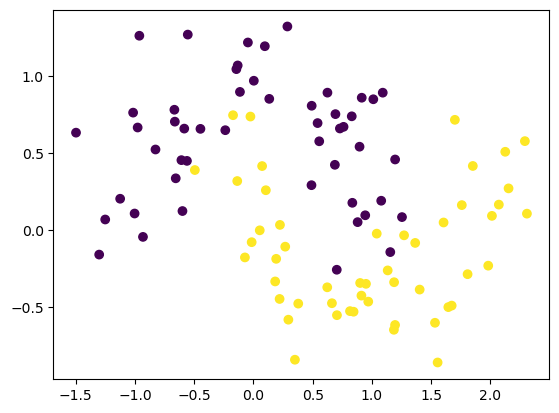

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


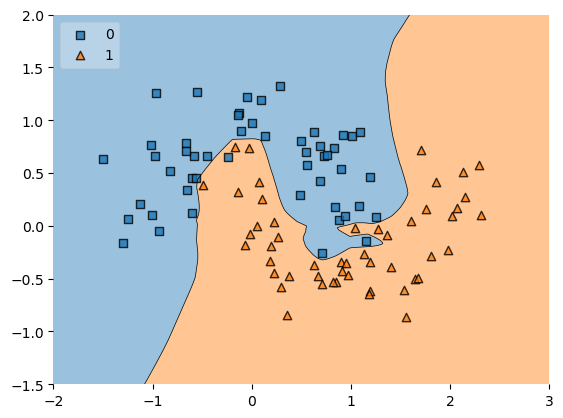

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

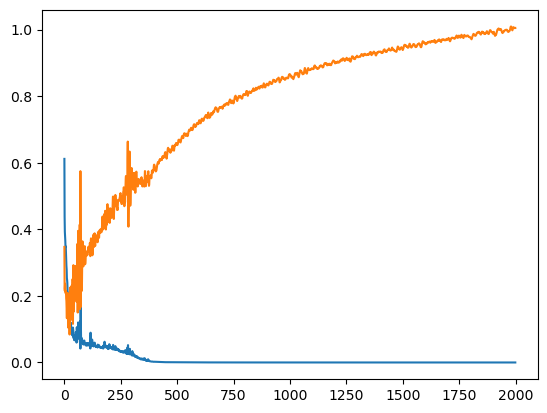

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [8]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


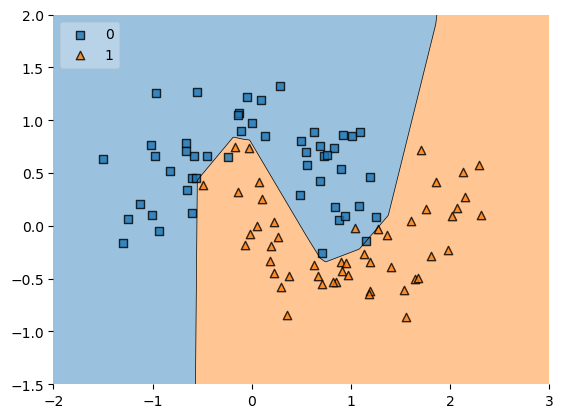

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [11]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

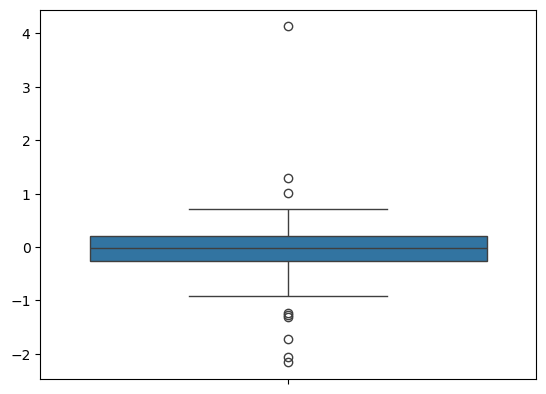

In [12]:
sns.boxplot(model1_weight_layer1)

<Axes: >

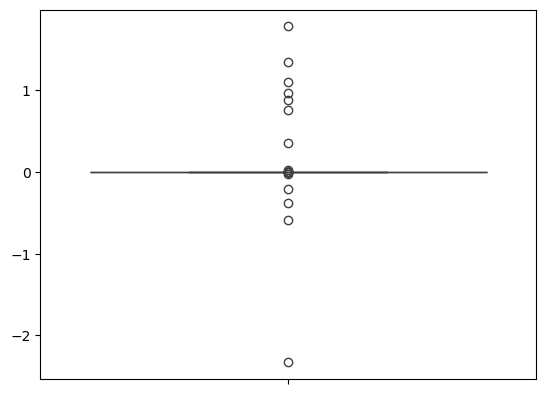

In [13]:
sns.boxplot(model2_weight_layer1)

In [14]:
model1_weight_layer1.min()

-2.162023

In [1]:
## End
print("End of the notebook")
print("End of the notebook")

End of the notebook
End of the notebook
